# Yoga Poses Detection 

# Libraries


In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

import pandas as pd
from sklearn.metrics import classification_report


In [98]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Path

In [13]:
#Read the train and test file 

train_dir = '/Users/areejalhuthali/Downloads/TRAIN' #directory with training images
test_dir = '/Users/areejalhuthali/Downloads/TEST' #directory with testing images

# Rescale the train and test images

In [14]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [15]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


# Model

In [17]:
# Adding Dropout layer to prevent overfitting problem and  dense layer with relu Activation function 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    #output layer 
    tf.keras.layers.Dense(5, activation='softmax')
])

2022-11-04 15:32:00.907323: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Compile the model

In [18]:
#Using 'adam' optimizer with 50 epoch 
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
epochs = 50  
batch_size = 16

# Model summary

In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 128)       0

# Fit the model

In [21]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)


Epoch 1/50


/Users/areejalhuthali/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


55/55 [==============================] - 200s 4s/step - loss: 2.9373 - accuracy: 0.2471 - val_loss: 1.6007 - val_accuracy: 0.2500
Epoch 2/50
55/55 [==============================] - 176s 3s/step - loss: 1.6001 - accuracy: 0.2402 - val_loss: 1.5806 - val_accuracy: 0.2717
Epoch 3/50
55/55 [==============================] - 164s 3s/step - loss: 1.6005 - accuracy: 0.2390 - val_loss: 1.5858 - val_accuracy: 0.2717
Epoch 4/50
55/55 [==============================] - 158s 3s/step - loss: 1.5854 - accuracy: 0.2818 - val_loss: 1.4011 - val_accuracy: 0.4674
Epoch 5/50
55/55 [==============================] - 173s 3s/step - loss: 1.4547 - accuracy: 0.4042 - val_loss: 1.0721 - val_accuracy: 0.6087
Epoch 6/50
55/55 [==============================] - 165s 3s/step - loss: 1.3246 - accuracy: 0.4827 - val_loss: 1.0515 - val_accuracy: 0.6413
Epoch 7/50
55/55 [==============================] - 160s 3s/step - loss: 1.1832 - accuracy: 0.5358 - val_loss: 0.8746 - val_accuracy: 0.6848
Epoch 8/50
55/55 [======

# Accuracy and Loss Plot

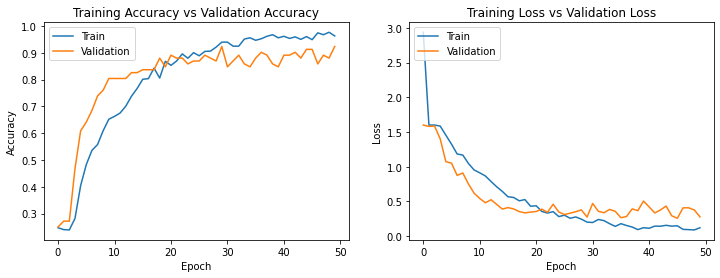

In [22]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [57]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

 1/55 [..............................] - ETA: 4:46 - loss: 0.0739 - accuracy: 0.9375

/Users/areejalhuthali/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


3/3 [==============================] - 5s 1s/step - loss: 0.2776 - accuracy: 0.9239
final train accuracy = 99.65 , validation accuracy = 92.39


# Extract the label from the validition

In [58]:
y_val_org=[]
for i in range(validation_generator.__len__()):
    y_val_org.extend(
        validation_generator.__getitem__(i)[1]
    )
y_val_org=np.array(y_val_org)
y_val_org=np.argmax(y_val_org,axis=1)


In [59]:
y_val_org

array([0, 1, 1, 0, 4, 2, 0, 3, 2, 4, 2, 2, 4, 4, 1, 2, 0, 4, 4, 2, 3, 0,
       3, 2, 0, 0, 1, 1, 2, 2, 2, 0, 1, 4, 1, 3, 2, 4, 1, 3, 3, 2, 4, 4,
       4, 0, 0, 0, 2, 4, 1, 2, 1, 1, 4, 1, 4, 0, 3, 3, 3, 4, 2, 2, 3, 4,
       2, 4, 2, 1, 3, 3, 0, 2, 0, 4, 2, 1, 2, 0, 1, 0, 4, 2, 0, 4, 4, 2,
       0, 1, 3, 0])

# predication of validation

In [60]:
predication=model.predict(validation_generator)
predication

3/3 [==============================] - 5s 1s/step


array([[1.00000000e+00, 1.99894745e-12, 6.58947272e-11, 6.05388137e-18,
        1.32257690e-13],
       [1.13707495e-06, 5.74035570e-03, 6.01270061e-04, 1.10397290e-03,
        9.92553294e-01],
       [1.32300382e-09, 9.99750435e-01, 2.33293243e-08, 8.72634075e-07,
        2.48767727e-04],
       [1.00000000e+00, 2.55149504e-12, 6.19538154e-09, 1.49525761e-14,
        1.06475710e-10],
       [3.80258053e-03, 8.19854718e-03, 7.74233020e-04, 8.32159480e-04,
        9.86392438e-01],
       [6.60755420e-16, 1.27267627e-10, 1.00000000e+00, 4.29744895e-18,
        6.24887376e-15],
       [9.99998450e-01, 2.83896743e-11, 1.52517748e-06, 4.81945687e-14,
        5.05330444e-09],
       [1.34967463e-11, 3.00456236e-07, 1.91876666e-13, 9.99999642e-01,
        2.62334887e-09],
       [6.72583847e-05, 8.36044492e-05, 9.99792159e-01, 1.43614670e-05,
        4.27031337e-05],
       [5.07812249e-04, 2.55036307e-03, 3.39129716e-02, 5.71694291e-05,
        9.62971687e-01],
       [4.17637324e-07, 1.6891

# convert predication into label

In [64]:
prediction_classes=[np.argmax(element)for element in predication]
prediction_classes

[0,
 4,
 1,
 0,
 4,
 2,
 0,
 3,
 2,
 4,
 2,
 2,
 4,
 4,
 1,
 2,
 0,
 4,
 4,
 2,
 3,
 0,
 3,
 2,
 0,
 0,
 4,
 1,
 2,
 2,
 2,
 0,
 1,
 4,
 1,
 3,
 2,
 4,
 1,
 3,
 3,
 2,
 4,
 4,
 4,
 0,
 0,
 0,
 2,
 4,
 1,
 2,
 1,
 1,
 4,
 0,
 4,
 0,
 3,
 3,
 3,
 4,
 2,
 2,
 3,
 4,
 2,
 1,
 2,
 1,
 3,
 3,
 2,
 2,
 0,
 4,
 2,
 4,
 2,
 0,
 1,
 0,
 4,
 2,
 0,
 4,
 0,
 2,
 0,
 1,
 3,
 0]

# classification Report

In [67]:
print(classification_report(y_val_org,prediction_classes))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.92      0.75      0.83        16
           2       0.96      1.00      0.98        23
           3       1.00      1.00      1.00        13
           4       0.86      0.90      0.88        21

    accuracy                           0.92        92
   macro avg       0.93      0.92      0.92        92
weighted avg       0.92      0.92      0.92        92



# testing

In [135]:
from tensorflow.keras.preprocessing import image 
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
img = image.load_img('/Users/areejalhuthali/Downloads/TEST/goddess/00000000.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes) 

1/1 [==============================] - 5s 5s/step
[[0. 1. 0. 0. 0.]]
